<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter5/polyregpress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 5.2
## Import modules


In [2]:
import numpy as np
from numpy.random import rand, randn
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from scipy.linalg import hilbert # Add Hibert matrix
import scipy
import math 
from scipy.special import gamma
print(scipy.__version__)
print(np.__version__)

1.4.1
1.19.5


## Define data generator

In [3]:
def generate_data(beta , sig, n):
    u = np.random.rand(n, 1)
    y = u ** np.arange(0, 4) @ beta.reshape((4,1)) + sig * np.random.randn(n, 1)
    return u.reshape((n,)), y.reshape((n,))

## Set random seed

In [4]:
np.random.seed(12)
#np.random.seed(1200)

## Original program

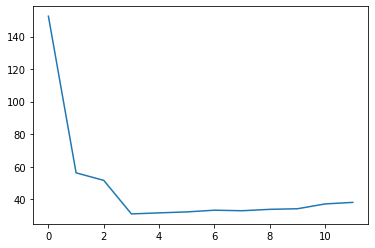

In [5]:
beta = np.array([10, -140, 400, -250]);
sig=5; n = 10**2;
u,y = generate_data(beta,sig,n)

K = 12 #maximum number of parameters
press = np.zeros(K)
for k in range(K):
    poly = PolynomialFeatures(k)
    X = poly.fit_transform(u.reshape(-1, 1)) # construct the model matrix
    P = X @ (np.linalg.inv(X.T @ X) @ (X.T)) # hat matrix
    e = y - P @ y

    press[k] = np.mean(np.power(np.divide(e,(1-np.diag(P))),2))

plt.plot(press) 
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%